# Losses can have non optimal local minimas

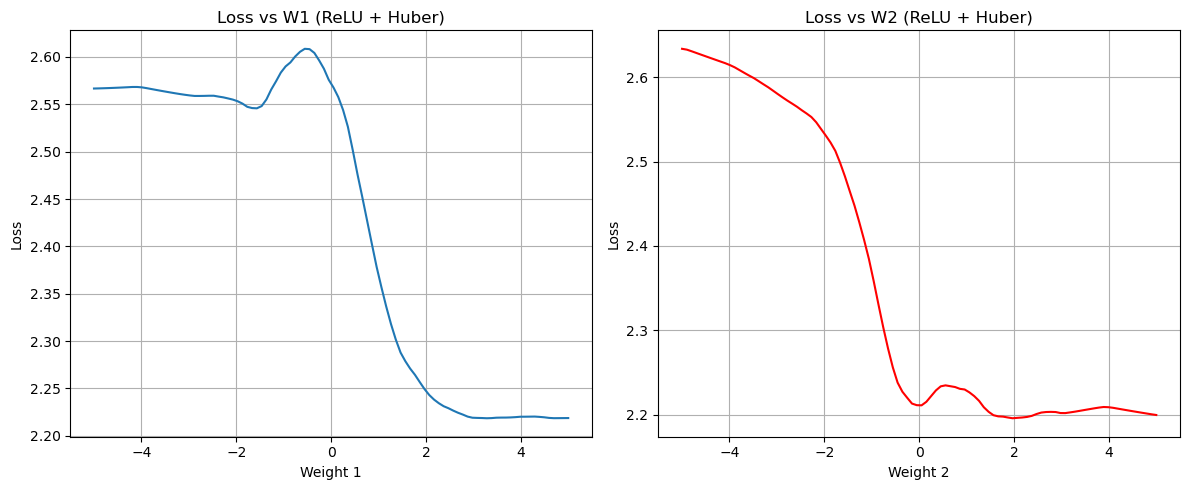

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate dataset: y = 4 + 2*x1 + 3*x2 + noise
np.random.seed(42)
X = np.random.rand(100, 2) * 2 - 1  
y = 4 + 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100) * 0.5  

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Huber loss function
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    abs_error = np.abs(error)
    quadratic = 0.5 * (error ** 2)
    linear = delta * (abs_error - 0.5 * delta)
    return np.mean(np.where(abs_error < delta, quadratic, linear))

# Loss function with non-linearity
def compute_loss(w1, w2, X, y):
    b1, b2 = 0.5, -0.5  
    W_out = np.array([[2.0], [-2.0]])  
    b_out = 0.3  

    hidden_input = np.dot(X, np.array([[w1, w2]]).T) + np.array([[b1, b2]])
    hidden_output = relu(hidden_input)  
    final_output = np.dot(hidden_output, W_out) + b_out  

    return huber_loss(y, final_output.flatten(), delta=1.0)

# Generate weight range
w_values = np.linspace(-5, 5, 100)
loss_w1 = np.zeros(100)
loss_w2 = np.zeros(100)

fixed_w1, fixed_w2 = 1.0, -1.0  

# Compute loss for individual weights
for i, w in enumerate(w_values):
    loss_w1[i] = compute_loss(w, fixed_w2, X, y)
    loss_w2[i] = compute_loss(fixed_w1, w, X, y)

# Plot Loss vs W1 and W2
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(w_values, loss_w1, label="Loss w.r.t W1")
axes[0].set_xlabel("Weight 1")
axes[0].set_ylabel("Loss")
axes[0].set_title("Loss vs W1 (ReLU + Huber)")
axes[0].grid()

axes[1].plot(w_values, loss_w2, label="Loss w.r.t W2", color='r')
axes[1].set_xlabel("Weight 2")
axes[1].set_ylabel("Loss")
axes[1].set_title("Loss vs W2 (ReLU + Huber)")
axes[1].grid()

plt.tight_layout()
plt.show()


# GD

In [2]:
import pandas as pd

In [3]:
x1=np.random.randint(low=1,high=20,size=20000)
x2=np.random.randint(low=1,high=20,size=20000)
y=3+2*x1-4*x2+np.random.random(20000)

In [4]:
x=pd.DataFrame({'intercept':np.ones(20000),'x1':x1,'x2':x2})

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
sk_model=LinearRegression()

In [7]:
sk_model.fit(pd.DataFrame({'x1':x1,'x2':x2}),y)

LinearRegression()

In [8]:
w_sk=[sk_model.intercept_]+list(sk_model.coef_)

In [9]:
w_sk

[3.503417060232362, 1.9997146988863383, -3.999945068174003]

In [10]:
w=np.random.random(x.shape[1])

In [11]:
w

array([0.69176061, 0.5924454 , 0.64358075])

In [12]:
def my_pred(x,w):

    preds=x@w
    return preds

In [13]:
def my_error(y,x,w):

    error=y-my_pred(x,w)
    return error

In [14]:
def my_cost(y,x,w):
    error=my_error(y,x,w)
    cost=error.T@error
    return cost

In [15]:
def grad(y,x,w):

    error=my_error(y,x,w)
    grad=-x.T@error/x.shape[0]
    return np.array(grad)

In [16]:
grad(y,x,w)

array([ 29.49342671, 255.45909293, 432.80486768])

In [17]:
def lr_gd(y,x,learning_rate,num_steps):

    wts=np.zeros(x.shape[1])
    cost=[]
    for i in range(num_steps):
        wts-=learning_rate*grad(y,x,wts)

        cost.append(my_cost(y,x,wts))
        
    return cost,wts

        

In [18]:
cost_gd,w_gd=lr_gd(y,x,.001,1000)

In [19]:
w_sk

[3.503417060232362, 1.9997146988863383, -3.999945068174003]

In [20]:
w_gd

array([ 0.35488691,  2.13531683, -3.86267822])

In [21]:
def lr_sgd(y,x,learning_rate,num_steps):

    wts=np.zeros(x.shape[1])
    cost=[]
    for i in range(num_steps):
        rand_ind=np.random.choice(range(x.shape[0]),10)
        y_sub=y[rand_ind]
        x_sub=x.iloc[rand_ind,:]

        
        wts-=learning_rate*grad(y_sub,x_sub,wts)

        cost.append(my_cost(y,x,wts))
        
    return cost,wts

In [22]:
cost_sgd,w_sgd=lr_sgd(y,x,.001,1000)

In [23]:
w_sgd

array([ 0.34156823,  2.13213986, -3.85238495])

<Axes: >

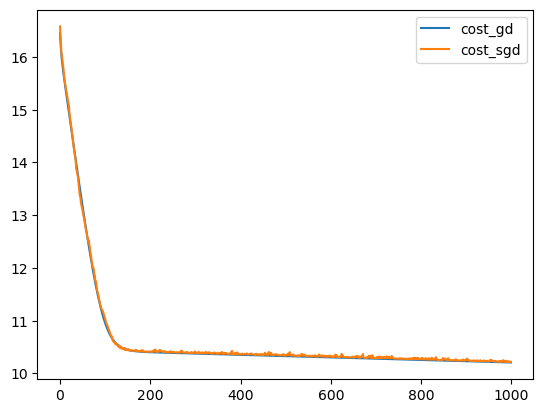

In [24]:
pd.DataFrame({'cost_gd':np.log(cost_gd),'cost_sgd':np.log(cost_sgd)}).plot()

In [25]:
def lr_sgd_mom(y,x,learning_rate,num_steps):

    wts=np.zeros(x.shape[1])
    cost=[]
    gamma=0.9
    v=np.zeros(x.shape[1])
    for i in range(num_steps):
        rand_ind=np.random.choice(range(x.shape[0]),10)
        y_sub=y[rand_ind]
        x_sub=x.iloc[rand_ind,:]

        g=grad(y_sub,x_sub,wts)
        v=gamma*v+(1-gamma)*g

        v_adj=v/(1-gamma**(i+1))
        
        wts-=learning_rate*v_adj

        cost.append(my_cost(y,x,wts))
        
    return cost,wts

In [29]:
cost_sgd_mom,w_sgd_mom=lr_sgd_mom(y,x,.01,1000) ## with stable sgd (with momentum) we are taking higher learning rate

In [30]:
w_sk

[3.503417060232362, 1.9997146988863383, -3.999945068174003]

In [27]:
w_sgd_mom

array([ 2.51019232,  2.0453434 , -3.96713737])

<Axes: >

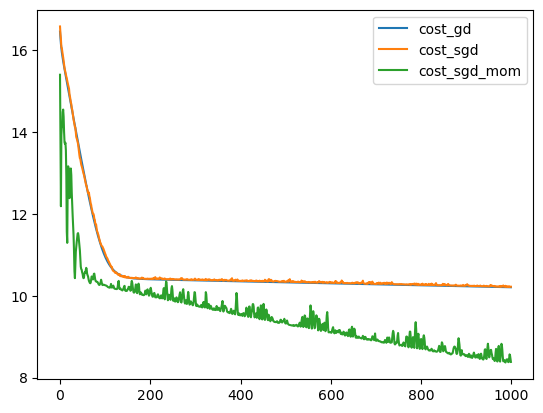

In [28]:
pd.DataFrame({'cost_gd':np.log(cost_gd),'cost_sgd':np.log(cost_sgd),'cost_sgd_mom':np.log(cost_sgd_mom)}).plot()

In [44]:
def lr_sgd_rms(y,x,learning_rate,num_steps):

    wts=np.zeros(x.shape[1])
    cost=[]
    gamma=0.99
    s=np.zeros(x.shape[1])
    
    for i in range(num_steps):
        rand_ind=np.random.choice(range(x.shape[0]),10)
        y_sub=y[rand_ind]
        x_sub=x.iloc[rand_ind,:]

        g=grad(y_sub,x_sub,wts)
        s=gamma*s+(1-gamma)*(g**2)

        s_adj=s/(1-gamma**(i+1)) 
        
        wts-=(learning_rate*g)/(np.sqrt(s_adj)+1e-8)

        cost.append(my_cost(y,x,wts))
        
    return cost,wts

In [45]:
cost_sgd_rms,w_sgd_rms=lr_sgd_rms(y,x,.01,1000) 

In [46]:
cost_sgd_rms

[17078649.92700613,
 16894461.481333688,
 16723169.391294368,
 16711255.615044955,
 16542826.628887268,
 16475825.237013435,
 16462523.10873584,
 16355695.353028944,
 16300999.734119056,
 16083889.813793095,
 15935033.107431453,
 15765293.335233666,
 15780524.646395948,
 15663932.123882124,
 15633146.737244733,
 15427442.598002767,
 15346138.359852811,
 15264963.535786433,
 15083208.257832838,
 14817708.85665254,
 14687703.053170193,
 14566570.485096328,
 14376552.417788569,
 14359550.716782913,
 14277310.416707171,
 14223572.644202923,
 14177498.716570634,
 14107202.942440532,
 14008870.642941605,
 13847780.110918801,
 13868528.627867064,
 13834485.400985552,
 13759209.69318681,
 13654518.606442759,
 13559158.531243976,
 13538134.798242508,
 13437772.542220838,
 13318083.622089138,
 13233523.369860599,
 13172341.838631343,
 13109680.059396323,
 13009537.023519482,
 12923456.210677762,
 12844640.448203288,
 12769905.510899136,
 12752698.732837573,
 12679398.442572434,
 12581912.5154696

In [47]:
w_sgd_rms

array([ 0.38931629,  2.12277602, -3.86917516])

<Axes: >

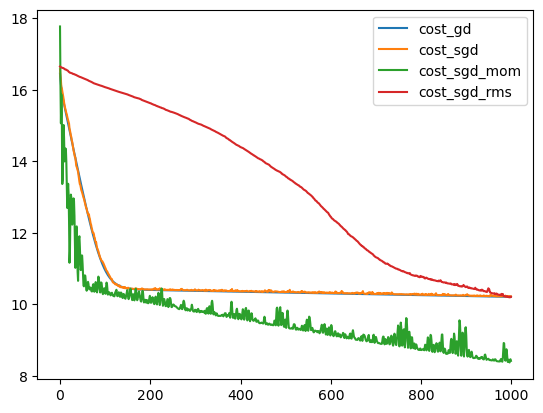

In [48]:
pd.DataFrame({'cost_gd':np.log(cost_gd),'cost_sgd':np.log(cost_sgd), 'cost_sgd_mom':np.log(cost_sgd_mom), 'cost_sgd_rms':np.log(cost_sgd_rms)}).plot()

In [72]:
def adam(y,x,learning_rate,num_steps):

    wts=np.zeros(x.shape[1])
    cost=[]
    gamma1=0.9
    gamma2=0.99
    s=np.zeros(x.shape[1])
    v=np.zeros(x.shape[1])
    for i in range(num_steps):
        rand_ind=np.random.choice(range(x.shape[0]),10)
        y_sub=y[rand_ind]
        x_sub=x.iloc[rand_ind,:]

        g=grad(y_sub,x_sub,wts)
        
        v=gamma1*v+(1-gamma1)*g
        s=gamma2*s+(1-gamma2)*(g**2)

        v_adj = v/(1-gamma1**(i+1))
        s_adj=s/(1-gamma2**(i+1)) 
        
        wts-=(learning_rate*v_adj)/(np.sqrt(s_adj)+1e-8)

        cost.append(my_cost(y,x,wts))
        
    return cost,wts

In [73]:
cost_adam,w_adam=adam(y,x,.04,1000) 

<Axes: >

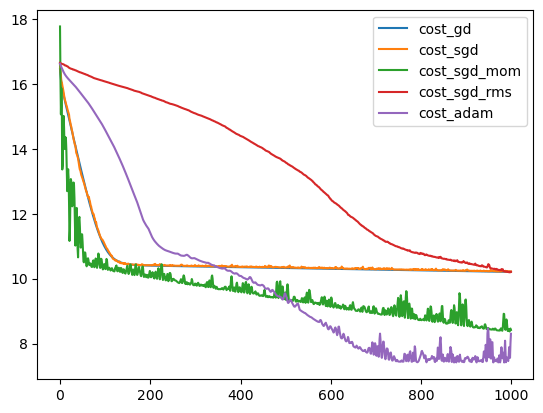

In [74]:
pd.DataFrame({'cost_gd':np.log(cost_gd),'cost_sgd':np.log(cost_sgd), 'cost_sgd_mom':np.log(cost_sgd_mom), 'cost_sgd_rms':np.log(cost_sgd_rms), 'cost_adam':np.log(cost_adam)}).plot()

In [ ]:
## funny thing try seeing swapping gamma1 and gamma2 in adam